# [Taller 05] Mínimos cuadrados

## A)  Interpole los puntos:

$p1 = (5.4, 3.2)$
    $p2_i = (9.5, 0.7)$
    $p3 = (12.3, -3.6)$

De estos, el punto $p2i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos. 

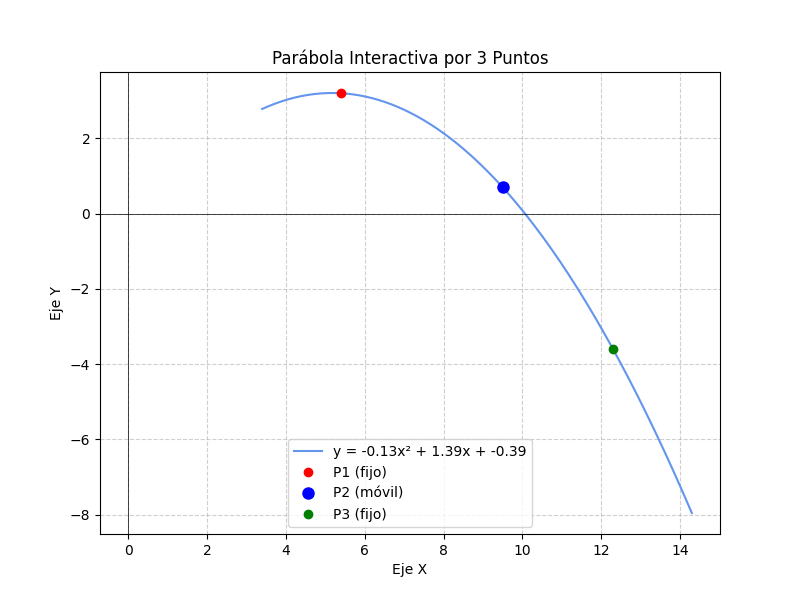

In [2]:
# 1. Importaciones necesarias
import numpy as np
import matplotlib.pyplot as plt

# 2. Habilitar el backend interactivo de Matplotlib en Jupyter
# Esta línea es clave para que el gráfico sea interactivo.
%matplotlib widget

# 3. Definición de los puntos iniciales
# Usamos arrays de NumPy para facilitar las operaciones matemáticas.
p1 = np.array([5.4, 3.2])
p2_interactive = np.array([9.5, 0.7]) # Este es el punto que se podrá mover
p3 = np.array([12.3, -3.6])

# Variable global para gestionar el estado del arrastre del punto
selected_point = None
TOLERANCE = 0.5 # Área de sensibilidad para hacer clic en el punto

# 4. Función para resolver el sistema de ecuaciones y encontrar la parábola
def solve_parabola_coeffs(p1, p2, p3):
    """
    Calcula los coeficientes (a, b, c) de la parábola y = ax^2 + bx + c
    que pasa por los tres puntos dados.
    """
    # Matriz de Vandermonde
    A = np.array([
        [p1[0]**2, p1[0], 1],
        [p2[0]**2, p2[0], 1],
        [p3[0]**2, p3[0], 1]
    ])
    # Vector de resultados (coordenadas y)
    b_vec = np.array([p1[1], p2[1], p3[1]])
    
    # Resolvemos el sistema de ecuaciones A * x = b_vec para encontrar [a, b, c]
    try:
        coeffs = np.linalg.solve(A, b_vec)
        return coeffs
    except np.linalg.LinAlgError:
        # Esto ocurre si los puntos son colineales y no se puede formar una única parábola
        return None

# 5. Función principal para dibujar y actualizar el gráfico
def update_plot():
    """
    Limpia el gráfico actual y dibuja la nueva parábola y los puntos.
    """
    ax.clear() # Limpiar el lienzo para redibujar
    
    points = np.array([p1, p2_interactive, p3])
    coeffs = solve_parabola_coeffs(p1, p2_interactive, p3)
    
    if coeffs is not None:
        a, b, c = coeffs
        # Generar puntos para dibujar la parábola de forma suave
        x_parabola = np.linspace(min(points[:, 0]) - 2, max(points[:, 0]) + 2, 200)
        y_parabola = a * x_parabola**2 + b * x_parabola + c
        
        # Dibujar la parábola
        ax.plot(x_parabola, y_parabola, label=f'y = {a:.2f}x² + {b:.2f}x + {c:.2f}', color='cornflowerblue')

    # Dibujar los puntos
    ax.plot(p1[0], p1[1], 'ro', label='P1 (fijo)')
    ax.plot(p2_interactive[0], p2_interactive[1], 'bo', markersize=8, label='P2 (móvil)')
    ax.plot(p3[0], p3[1], 'go', label='P3 (fijo)')
    
    # Estética del gráfico
    ax.set_title("Parábola Interactiva por 3 Puntos")
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    
    # Forzar el redibujado del lienzo
    fig.canvas.draw_idle()

# --- Lógica de la Interfaz Interactiva (Manejo de Eventos del Ratón) ---

def on_press(event):
    """Se activa al hacer clic con el ratón."""
    global selected_point
    # Ignorar clics fuera del área del gráfico
    if event.inaxes != ax:
        return
    
    # Calcular la distancia del clic al punto interactivo
    dist = np.sqrt((event.xdata - p2_interactive[0])**2 + (event.ydata - p2_interactive[1])**2)
    
    # Si el clic está suficientemente cerca, "seleccionamos" el punto
    if dist < TOLERANCE:
        selected_point = p2_interactive

def on_motion(event):
    """Se activa al mover el ratón mientras el botón está presionado."""
    # Si no hay un punto seleccionado o el ratón está fuera del gráfico, no hacer nada
    if selected_point is None or event.inaxes != ax:
        return
    
    # Actualizar las coordenadas del punto móvil a la posición actual del ratón
    selected_point[0] = event.xdata
    selected_point[1] = event.ydata
    
    # Redibujar todo con la nueva posición del punto
    update_plot()

def on_release(event):
    """Se activa al soltar el botón del ratón."""
    global selected_point
    # "Deseleccionar" el punto
    selected_point = None

# 6. Creación del gráfico y conexión de los eventos
fig, ax = plt.subplots(figsize=(8, 6))

# Conectar las funciones de evento al lienzo del gráfico
fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('motion_notify_event', on_motion)
fig.canvas.mpl_connect('button_release_event', on_release)

# Dibujar el estado inicial
update_plot()

# Mostrar el gráfico interactivo
plt.show()


## B) Interpole el siguiente conjunto de datos:

$xs = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]$

$ys = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]$

Polinomio de ajuste lineal (grado 1):
 
7.121 x - 2.931

Polinomio de ajuste cuadrático (grado 2):
       2
5.573 x - 6.623 x + 2.507



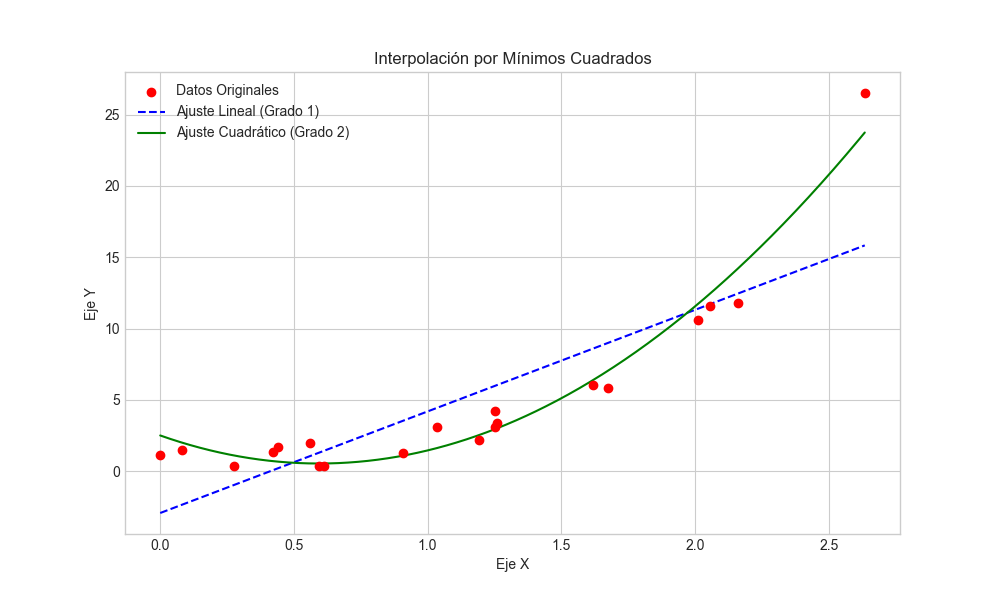

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
xs = np.array([
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134,
    0.9070, 1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761,
    2.0114, 2.0557, 2.1610, 2.6344,
])
ys = np.array([
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328,
    1.2887, 3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088,
    10.5890, 11.5865, 11.8221, 26.5077,
])

# --- Ajuste Polinómico por Mínimos Cuadrados ---

# Grado 1: Ajuste Lineal (y = m*x + c)
# np.polyfit devuelve los coeficientes del polinomio, [m, c]
coef_lineal = np.polyfit(xs, ys, 1)
# np.poly1d crea una función polinómica a partir de los coeficientes
polinomio_lineal = np.poly1d(coef_lineal)
print(f"Polinomio de ajuste lineal (grado 1):\n{polinomio_lineal}\n")


# Grado 2: Ajuste Cuadrático (y = a*x^2 + b*x + c)
# np.polyfit devuelve [a, b, c]
coef_cuadratico = np.polyfit(xs, ys, 2)
polinomio_cuadratico = np.poly1d(coef_cuadratico)
print(f"Polinomio de ajuste cuadrático (grado 2):\n{polinomio_cuadratico}\n")

# --- Visualización de los resultados ---

# Creamos un rango de valores de x más suave para graficar las curvas
x_continuo = np.linspace(xs.min(), xs.max(), 500)

# Calculamos los valores 'y' para cada curva de ajuste
y_lineal = polinomio_lineal(x_continuo)
y_cuadratico = polinomio_cuadratico(x_continuo)

# Configuramos la gráfica
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Graficamos los datos originales como puntos dispersos
plt.scatter(xs, ys, color='red', label='Datos Originales', zorder=5)

# Graficamos las curvas de ajuste
plt.plot(x_continuo, y_lineal, 'b--', label=f'Ajuste Lineal (Grado 1)')
plt.plot(x_continuo, y_cuadratico, 'g-', label=f'Ajuste Cuadrático (Grado 2)')

# Añadimos títulos y etiquetas
plt.title('Interpolación por Mínimos Cuadrados')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()
